# Błędy numeryczne

Zagadnienia:
* Reprezentacja liczb w komputerze:
    * Zapis stałoprzecinkowy,
    * Zapis zmiennoprzecinkowy (standard IEEE 754),
* Błędy numeryczne:
    * Błąd względny i bezwzględny.
    * Błąd zaokrąglenia (ang. *round-off error*).
    * Błąd obcięcia (ang. *truncation error*).
    * Błędy związane z przyjętym sposobem rozwiązywania.

## Błąd względny i bezwzględny

***Zadanie 1.***  
Liczbę $\textrm{e}$ możemy zdefiniować jako $\sum\limits_{n=0}^{\infty} \frac{1}{n!}$. Oblicz błąd względny i bezwzględny aproksymacji liczby $\textrm{e}$ poprzez $\textrm{e}^{*}$ w przypadku gdy:  
* $\textrm{e}_1^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$    

* $\textrm{e}_2^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$  

* $\textrm{e}_3^{*}=\sum\limits_{n=0}^{20} \frac{1}{n!}$  

In [99]:
import numpy as np
import math

print(f"{np.e = }")
e1 = np.sum([1/math.factorial(n) for n in np.arange(6)])
print(f"E1: wartość={e1}, błąd bezwzględny={abs(np.e-e1)}, błąd względny={abs(np.e-e1)/abs(np.e)}")
e2 = np.sum([1/math.factorial(n) for n in np.arange(11)])
print(f"E1: wartość={e2}, błąd bezwzględny={abs(np.e-e2)}, błąd względny={abs(np.e-e2)/abs(np.e)}")
e3 = np.sum([1/math.factorial(n) for n in np.arange(21)])
print(f"E1: wartość={e3}, błąd bezwzględny={abs(np.e-e3)}, błąd względny={abs(np.e-e3)/abs(np.e)}")

np.e = 2.718281828459045
E1: wartość=2.7166666666666663, błąd bezwzględny=0.0016151617923787498, błąd względny=0.0005941848175817597
E1: wartość=2.718281801146384, błąd bezwzględny=2.7312661021738904e-08, błąd względny=1.0047766473582343e-08
E1: wartość=2.7182818284590446, błąd bezwzględny=4.440892098500626e-16, błąd względny=1.6337129034990842e-16


## Zapis zmiennoprzecinkowy

**Uwaga**: Używane tu pojęcie **cecha** ma inne znaczenie, niż poznane być może w szkole – skrótowo: „część całkowita”. Dlatego poniżej dodawane jest inne określenie – „wykładnik”.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [101]:
print(np.finfo(float))
eps = np.finfo(float).eps

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



***Zadanie 2.***


a) Wstaw dowolną wartość do liczby x, np. 0.1. Które liczby mają tę samą mantysę, a które tę samą cechę (wykładnik)? Sprawdź wypisując ich wartości w formacie hex.


**Uwaga:** Do odczytania liczby w formacie szesnastkowym możesz wykorzystać funkcję:

In [102]:
1.25.hex()

'0x1.4000000000000p+0'

In [103]:
2.0.hex()

'0x1.0000000000000p+1'

lub

In [104]:
import struct
def double_to_hex(f):
    return str(hex(struct.unpack('!Q', struct.pack('!d', f))[0]))[2:]
def hex_to_double(h):
    return struct.unpack('!d', bytes.fromhex(h))[0]

In [105]:
# CECHA TA SAMA
# Największy wykładnik mieszczący się do cechy: 4 => 4+1023 = 1027 = (sign)0 100 0000 0011 = 403
print(double_to_hex(17.125))
print(double_to_hex(31.25))
# Największy wykładnik mieszczący się do cechy: 5 => 5+1023 = 1028 = (sign)0 100 0000 0100 = 404
print(double_to_hex(32.25))

print("---")

# MANTYSA TA SAMA
# Czyli po prostu mnożnik cechy: 1.25 jest taki sam
print(double_to_hex(5*1.25))
print(double_to_hex(20*1.25))

4031200000000000
403f400000000000
4040200000000000
---
4019000000000000
4039000000000000


Zamianę w drugą stronę można przeprowadzić za pomocą funkcji *int*

In [106]:
print(int('3ff', 16))

1023




b) Porównaj zapis liczb 0.1, 0.2 i 0.3 w formacie zmiennoprzecinkowym.

* Czy można przewidzieć, czy suma 0.1 + 0.2 będzie reprezentowana dokładnie tak samo jak liczba 0.3?
* Jaki będzie wynik porównania tej sumy z liczbą 0.3 i konsekwencje użycia warunku równościowego / nierównościowego w pętli?



In [107]:
print(double_to_hex(0.1))
print(double_to_hex(0.2))
print("------------------- +")
print(double_to_hex(0.1+0.2), '\n')

print(double_to_hex(0.3))

3fb999999999999a
3fc999999999999a
------------------- +
3fd3333333333334 

3fd3333333333333


c) Przyjmijmy, że „skrótowe” określenie *liczba dokładnie reprezentowana* oznacza liczbę, która jest reprezentowana w formacie zmiennoprzecinkowym dokładnie, tzn. bez konieczności zaokrąglania.
* Ile jest liczb dokładnie reprezentowanych w przedziale $[1, 2)$?
* Zaobserwuj (z pomocą formatu hex) jakie wartości mają bity w polu mantysy w przypadku liczby 1.0.
* Jaką liczbę trzeba dodać do 1.0, aby tylko na najmłodszej pozycji pola mantysy pojawiło się 1?
* Czy wyżej otrzymana suma jest najmniejszą liczbą dokładnie reprezentowana, spośród liczb większych od 1?
* Jak przypuszczasz, jakie wartości będą miały poszczególne bity mantysy w przypadku największej liczby dokładnie reprezentowanej, której cecha (wykładnik) jest równy 0? Sprawdź, czy tak jest rzeczywiście – wpisując wartość tej liczby (jaka to jest wartość?).


In [108]:
print(0.99999.hex())
print(double_to_hex(1.0))
print(1.0.hex())
print(1.99999.hex())
print(2.0.hex())

# 1.
# Liczby [1,2) mają wykładnik 0 => cecha = 3FF
# Więc jest tyle liczb dokładnie reprezentowanych ile możliwości mantysy czyli: n^52

# 2. 
# Dla liczby 1.0 bity w polu mantysy mają wartości 0, ponieważ wykładnik = 0, czyli 2^0 = 1, więc mantysa jest znormalizowaną 1

# 3. 
print(double_to_hex(1.0+eps)) # 3ff0000000000001
# Epsilon typu Float64

# 4.
# TAK

# 5.
# wykładnik = 0 -> cecha = 3FF
# mantysa - największa -> mantysa = FFFFFFFFFFFFF
print(hex_to_double("3FFFFFFFFFFFFFFF")) # 1.9999999999999998

0x1.fffeb074a771dp-1
3ff0000000000000
0x1.0000000000000p+0
0x1.ffff583a53b8ep+0
0x1.0000000000000p+1
3ff0000000000001
1.9999999999999998


d) Oblicz długości przedziałów, do których należą wszystkie liczby mające cechę (wykładnik) równy: 0, 1, 2, 5, -1, -3.

* Czy w każdym z tych przedziałów jest tyle samo liczb dokładnie reprezentowanych? Jeżeli nie, to ile w każdym z nich?
* Jaka jest odległość między dwoma sąsiednimi liczbami dokładnie reprezentowanymi (odległość, czyli różnica ich wartości) w każdym z tych przedziałów?
* Jaki jest maksymalny błąd bezwzględny zaokrąglenia w każdym z tych przedziałów?
* Jaki jest maksymalny błąd względny zaokrąglenia w każdym z tych przedziałów?





In [109]:
exponents = [0, 1, 2, 5, -1, -3]

for exp in exponents:
    cecha = str(hex(exp+1023))[2:]
    print(f"wykładnik={exp}, cecha={cecha}")
    start = hex_to_double(cecha+"0000000000000")
    end = hex_to_double(cecha+"FFFFFFFFFFFFF")
    print(f"[{start},{end}]")
    print(f"długość przedziału={end-start}")
    

wykładnik=0, cecha=3ff
[1.0,1.9999999999999998]
długość przedziału=0.9999999999999998
wykładnik=1, cecha=400
[2.0,3.9999999999999996]
długość przedziału=1.9999999999999996
wykładnik=2, cecha=401
[4.0,7.999999999999999]
długość przedziału=3.999999999999999
wykładnik=5, cecha=404
[32.0,63.99999999999999]
długość przedziału=31.999999999999993
wykładnik=-1, cecha=3fe
[0.5,0.9999999999999999]
długość przedziału=0.4999999999999999
wykładnik=-3, cecha=3fc
[0.125,0.24999999999999997]
długość przedziału=0.12499999999999997


***Zadanie 3.***

Spójrz na poniższe zjawiska, zastanów się nad ich przyczynami.

***Problem skali***

Jaki wynika da poniższy kod:

In [110]:
a = 1.0
b = 0.0000000000000000000000001
c = a + b
print(f'{c:.80f}')

# BŁĄD ZAOKRĄGLENIA: utrata precyzji

1.00000000000000000000000000000000000000000000000000000000000000000000000000000000


***Problem reprezentacji w zapisie binarnym*** 

In [111]:
if 0.1+0.2==0.3:
    print("True")
else:
    print("False")

# BŁĄD ZAOKRĄGLENIA

False


In [112]:
suma = 0
for i in range(0,100):
    suma += 0.1
print(f'{suma:.15f}\n')

print("0.1 hex:",double_to_hex(0.1))
print("SUMA hex:",double_to_hex(suma))
print("10 hex:",double_to_hex(10))

# BŁĄD ZAOKRĄGLENIA

9.999999999999980

0.1 hex: 3fb999999999999a
SUMA hex: 4023fffffffffff5
10 hex: 4024000000000000


**Zadanie 4.**

Niech:
* $a=0.3$
* $b=10^{-13}$
* $c=a-b$
* $d=a-c$

Czy $b$ i $d$ są sobie równe w sensie analitycznym? Co z przypadkiem numerycznym? Zdefiniuj odpowiednie zmienne i porównaj wyniki. Porównaj szesnastkowe i dziesietne reprezentacje zmiennych `b` i `d`. Ile cyfr w reprezentacji `d` możemy uznać za wiarygodne?

In [113]:
a = 0.3
b = 1e-13

print(f"{a = }") # a = 0.3
print(f"{b = :.15}") # b = 1e-13

c = a-b
print(f"{c = :.15}") # c = 0.2999999999999

d = a-c
print(f"{d = :.15}") # d = 9.99755833674953e-14

# ANALITYCZNIE: d = a-c = a-(a-b) = b

a = 0.3
b = 1e-13
c = 0.2999999999999
d = 9.99755833674953e-14


**Zadanie 5.**

Rozważmy macierz kwadratową:
$$ A=\left[\begin{array}{ccc}
\sqrt{2} & \frac{1}{7}\\
\pi\sqrt{2} &\frac{\pi}{7}\\
\end{array}\right]
$$
* Czy jest to macierz osobliwa? Jak to sprawdzić?
* Oblicz wyznacznik tej macierzy w sposób analityczny i numeryczny (`np.linalg.det`). Czy otrzymałeś te same wartości? Czy wyniki obliczeń numerycznych prowadzą do poprawnej odpowiedzi na pierwsze pytanie? Jakie może to mieć skutki?

In [114]:
m = np.array([[np.sqrt(2), 1/7],[np.pi*np.sqrt(2), np.pi/7]])
print(np.linalg.det(m))

# ANALITYCZNIE: \sqrt{2} \cdot \frac{\pi}{7} - \pi \sqrt{2} \cdot \frac{1}{7} = 0

0.0


**Zadanie 6.**

Jedną z metod rozwiązywania równań nieliniowych jest metoda Newtona. Metoda ta powtarza obliczenia, aż spełniony nie będzie warunek stopu. Jeżeli spełnione są odpowiednie założenia to metoda ta zbiega do rozwiązania. Załóżmy, że warunki są spełnione i rozważmy funkcję $f(x)=cos(x)-x$. Poniżej znajdziesz implementację metody Newtona, w której brakuje warunku stopu. Spróbuj go uzupełnić. Warunek powinien być spełniony w momencie, w którym chcemy zakończyć działanie procedury.

Z matematycznego punktu widzenia znajdujemy się w zerze, jeżeli kolejne przybliżenia uzyskane z metody Newtona nie różnią się od siebie (np. dwa ostatnie). Zaimplementuj taki warunek i sprawdź, czy program zatrzyma się. Czy taki warunek stopu jest bezpieczny i można go stosować uniwersalnie? Jak można go poprawić?

In [115]:
def newton(f, f_prim, x_0):
    x_prev = x_0
    while True:
        x_n=x_prev-(f(x_prev)/f_prim(x_prev))
        print(f'x_0={x_n}')
        print(double_to_hex(x_n))
        
        # if abs(f(x_n))<=eps or abs(x_n-x_prev)<=eps: # Warunek stopu z wikipedii
        if x_n == x_prev:
            return x_n
        else:
            x_prev=x_n

In [116]:
def f(x):
    return np.cos(x)-x

def f_prim(x):
    return -np.sin(x)-1

In [117]:
print(newton(f, f_prim, 0))

x_0=1.0
3ff0000000000000
x_0=0.7503638678402439
3fe802fb160f2a4d
x_0=0.7391128909113617
3fe7a6d013d085a5
x_0=0.739085133385284
3fe7a695dd9b2fdd
x_0=0.7390851332151607
3fe7a695dd83ce2e
x_0=0.7390851332151607
3fe7a695dd83ce2e
0.7390851332151607


**Zadanie domowe**  

Dany jest ciąg:  
  
$G(p)=\cfrac{1}{p}\left[10^{p}\left(1+p\pi^{*} \cdot 10^{-p}\right)-10^{p}\right],\ p=1,2,3,\dots,n $,
w którym $\pi^{*}$ jest przybliżeniem liczby $\pi$ z dokładnością do 15 miejsc po przecinku.
  
Stwórz funkcję, która umożliwi obliczenie $n$ pierwszych wyrazów tego ciągu i zwróci je w postaci wektora (do przybliżenia wartości $\pi$ możesz wykorzystać funkcję *[round](https://numpy.org/doc/stable/reference/generated/numpy.round_.html)*). Oblicz błąd bezwzględny i błąd względny otrzymanych wyników. Przedstaw rezultaty na wykresie w zależności od $n$. Wartości błędów przedstaw w skali logarytmicznej (funkcja *plt.semilogy()*).

Przeanalizuj rozwiązanie i odpowiedz na następujące pytania:  
* Czy w obliczeniach analitycznych wartość $G(p)$ zależy od $p$?
* Jak zmienia się błąd w zależności od $n$? O czym to świadczy?
* Z jakim/jakimi rodzajami błędu mamy do czynienie?


p:  1
x := 1+(PI*(10**-p)): 1.3141592653589793,	 (x*(10**p))-(10**p): 3.141592653589793
result:  3.141592653589793
---
p:  2
x := 1+(PI*(10**-p)): 1.031415926535898,	 (x*(10**p))-(10**p): 3.1415926535897967
result:  3.1415926535897967
---
p:  3
x := 1+(PI*(10**-p)): 1.0031415926535898,	 (x*(10**p))-(10**p): 3.1415926535897825
result:  3.14159265358982
---
p:  4
x := 1+(PI*(10**-p)): 1.000314159265359,	 (x*(10**p))-(10**p): 3.1415926535901235
result:  3.1415926535901235
---
p:  5
x := 1+(PI*(10**-p)): 1.000031415926536,	 (x*(10**p))-(10**p): 3.1415926535992185
result:  3.1415926535904877
---
p:  6
x := 1+(PI*(10**-p)): 1.0000031415926536,	 (x*(10**p))-(10**p): 3.1415926535846666
result:  3.1415926535846666
---
p:  7
x := 1+(PI*(10**-p)): 1.0000003141592653,	 (x*(10**p))-(10**p): 3.1415926534682512
result:  3.1415926537343433
---
p:  8
x := 1+(PI*(10**-p)): 1.0000000314159265,	 (x*(10**p))-(10**p): 3.141592651605606
result:  3.1415926534682512
---
p:  9
x := 1+(PI*(10**-p)): 1.0000000031

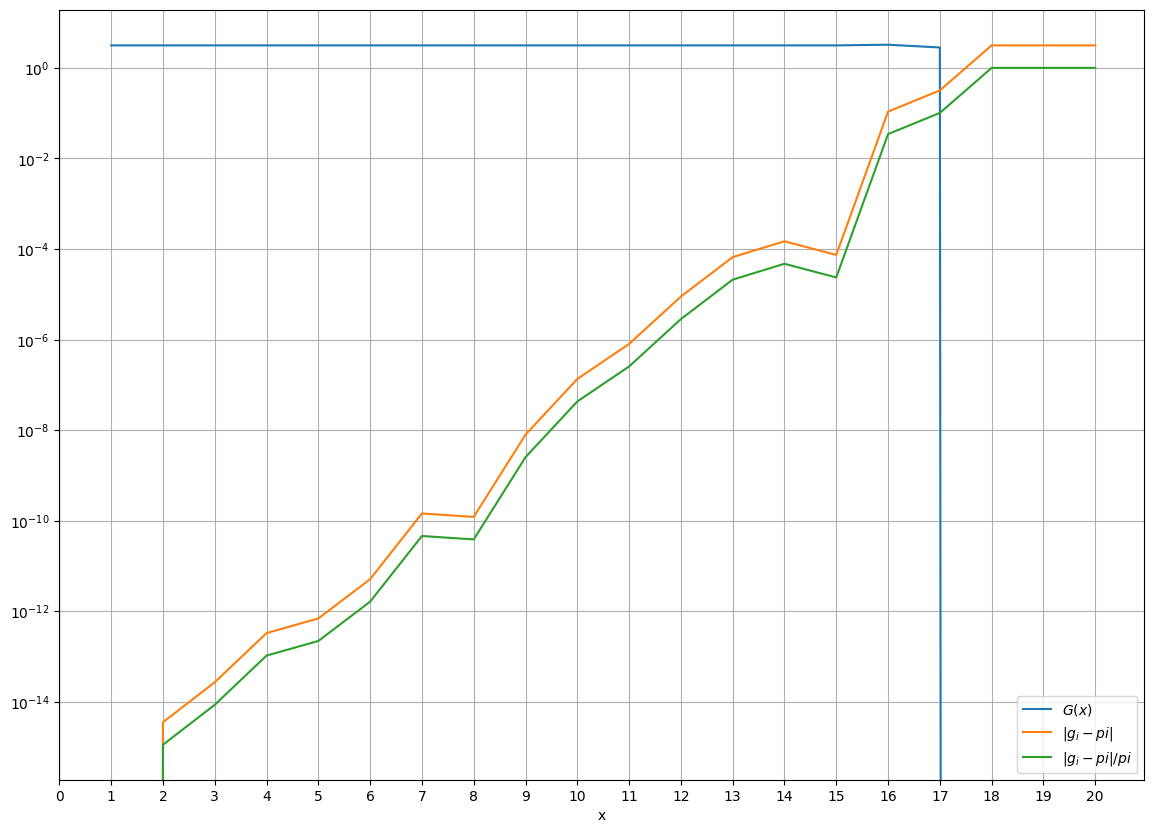

In [118]:
PI = np.round(np.pi, 15)
def G(p):
    result = (1.0/p) * ((10**p) * (1+p*PI*(10**-p)) - (10**p))
    print('p: ', p)
    print(f"x := 1+(PI*(10**-p)): {1+(PI*(10**-p))},\t (x*(10**p))-(10**p): {(1+(PI*(10**-p)))*(10**p) - (10**p)}")
    print('result: ', result)
    print("---")
    return result

def n_first_G_values(n):
    result = np.empty(n)
    for i in range(1, n+1):
        result[i-1] = G(i)
    return result

N = 20

values = n_first_G_values(N)
absolute_errors = [abs(PI-val) for val in values]
relative_errors = [err/abs(PI) for err in absolute_errors]
print('values: ', values)

plt.figure(figsize=(14,10))
X = np.arange(1, N+1)

plt.plot(X,values, label = '$G(x)$') # W argumencie label umieszcza się nazwy krzywych do legendy
plt.semilogy(X,absolute_errors, label = '$|g_i-pi|$')
plt.semilogy(X,relative_errors, label = '$|g_i-pi|/pi$')
plt.xlabel('x')
plt.xticks(np.arange(0,N+1, step=1))
plt.grid() # Wyświetlanie siatki
plt.legend() # Dodanie legendy
plt.axhline(y=0, color='k') # Dodanie osi x = 0
plt.axvline(x=0, color='k') # Dodanie osi y = 0

**Odpowiedzi:**

- Upraszczając analitycznie wzór na elementy ciągu `G(p)`, dochodzimy do wniosku że jego wartości nie zależą od `p`. Wartości ciągu `G_i = PI`.

- Błąd wraz ze wzrostem `p` staje się coraz większy aż dla `p>17` wynosi `PI`. Analizując wzór `G(p)`, można zauważyć skąd wynika błąd. Wartość PI jest dzielona przez `10^p`, inaczej mówiąc, jej przecinek jest przesuwany w lewo. To nie powoduje problemu do momentu dodania do `PI` w takiej formie wartości `1`. W wyniku tej operacji wraz ze wzrostem `p`, pozbywamy się kolejnych cyfr znaczących pomniejszonej liczby `PI`. Co dla `p>17` oznacza że wartości `PI` nie ma już w pamięci zmiennej typu double.

- Mamy tutaj do czynienie z błędem zaokrąglania, a bardziej dokładnie - utratą precyzji. Wartości `PI` występują od `p`-tego miejsca po przecinku co dla wyższych wartości `p` wykracza poza zakres precyzji typu double.